**Data Science case study**

RM fandom is a movie analytics non-profit that analyzes movie data to create visualizations, answer key questions
and find interesting patterns in data.

**Task**

Perform analysis on data from the Rick and Morty API to determine how different features are related to the number
of episodes a character appears in.

# **INTRODUCTION**: Analysis of Characters in "Rick and Morty"

"Rick and Morty," is a popular animated television series created by Justin Roiland and Dan Harmon. The show boasts a unique blend of science fiction, humor, and existential themes and follows the misadventures of an eccentric and alcoholic scientist, Rick Sanchez, and his good-hearted but easily influenced grandson, Morty Smith, as they embark on interdimensional escapades.

This project analyses the characters in the "Rick and Morty" universe using data pulled from the official Rick and Morty API.


In [ ]:
#importing libraries
import pandas as pd
import requests


In [ ]:
# Defining a function to fetch all rick & morty characters by iterating over pages
def fetch_all_characters(url):
    characters = []
    next_url = url
    while next_url:
        response = requests.get(next_url)
        data = response.json()
        characters.extend(data['results'])
        next_url = data['info']['next']
    return characters

# characters URL
url = "https://therickandmortyapi.vercel.app/api/character"

# Fetching all characters
all_characters = fetch_all_characters(url)

In [ ]:
#convert fetched characters to a pandas dataframe
df = pd.DataFrame(all_characters)

df.head()



,id,name,status,species,type,gender,location,origin,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Citadel of Ricks', 'url': 'https://t...","{'name': 'Earth (C-137)', 'url': 'https://ther...",https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T13:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'Citadel of Ricks', 'url': 'https://t...","{'name': 'unknown', 'url': ''}",https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T13:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T14:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T14:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T14:26:56.301Z


In [ ]:
# Handling location and origin columns with multiple JSON values
df['origin_name'] = df['origin'].apply(lambda x: x['name'])
df['location_name'] = df['location'].apply(lambda x: x['name'])

In [ ]:
# Dropping location and origin columns
df.drop(['origin', 'location'], axis=1, inplace=True)

# final resulting DataFrame
df.head()

,id,name,status,species,type,gender,image,episode,url,created,origin_name,location_name
0,1,Rick Sanchez,Alive,Human,,Male,https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T13:48:46.250Z,Earth (C-137),Citadel of Ricks
1,2,Morty Smith,Alive,Human,,Male,https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T13:50:21.651Z,unknown,Citadel of Ricks
2,3,Summer Smith,Alive,Human,,Female,https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T14:09:56.428Z,Earth (Replacement Dimension),Earth (Replacement Dimension)
3,4,Beth Smith,Alive,Human,,Female,https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T14:22:43.665Z,Earth (Replacement Dimension),Earth (Replacement Dimension)
4,5,Jerry Smith,Alive,Human,,Male,https://therickandmortyapi.vercel.app/api/char...,[https://therickandmortyapi.vercel.app/api/epi...,https://therickandmortyapi.vercel.app/api/char...,2017-11-04T14:26:56.301Z,Earth (Replacement Dimension),Earth (Replacement Dimension)


In [ ]:
# dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             826 non-null    int64 
 1   name           826 non-null    object
 2   status         826 non-null    object
 3   species        826 non-null    object
 4   type           826 non-null    object
 5   gender         826 non-null    object
 6   image          826 non-null    object
 7   episode        826 non-null    object
 8   url            826 non-null    object
 9   created        826 non-null    object
 10  origin_name    826 non-null    object
 11  location_name  826 non-null    object
dtypes: int64(1), object(11)
memory usage: 77.6+ KB


In [ ]:
# dataframe shape (rows x columns)

df.shape


(20, 12)

In [ ]:
#list of columns present in the dataframe
df.columns

Index(['id', 'name', 'status', 'species', 'type', 'gender', 'origin',
       'location', 'image', 'episode', 'url', 'created'],
      dtype='object')

In [ ]:
df['name'].nunique()

757

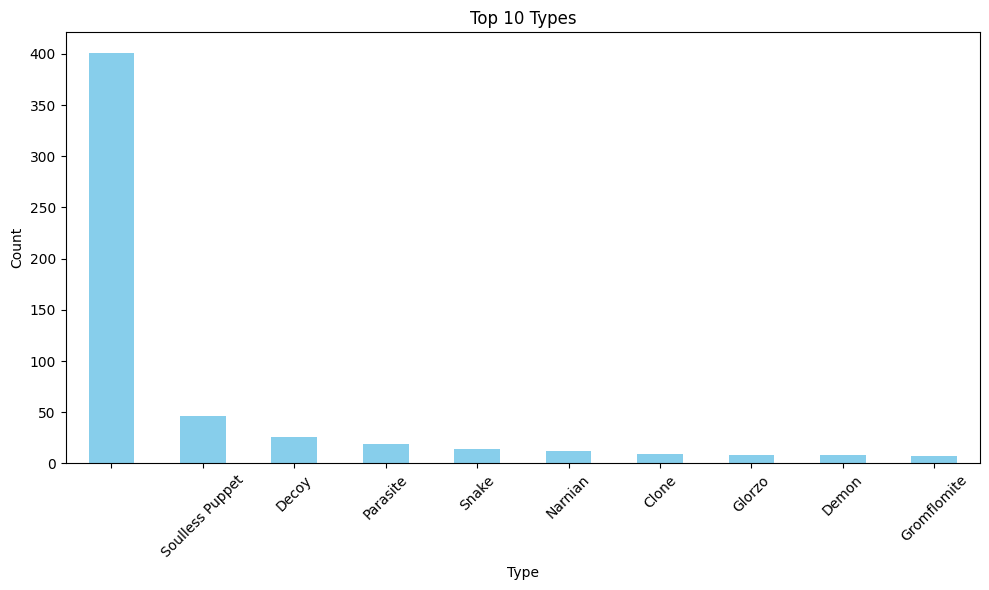

In [ ]:
#@title Plot of top 10 types of characters
top_10_types = df['type'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_types.plot(kind='bar', color='skyblue')
plt.title('Top 10 Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-42-81a2b9b5a251>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='Set2', order=df['species'].value_counts().index[:10])


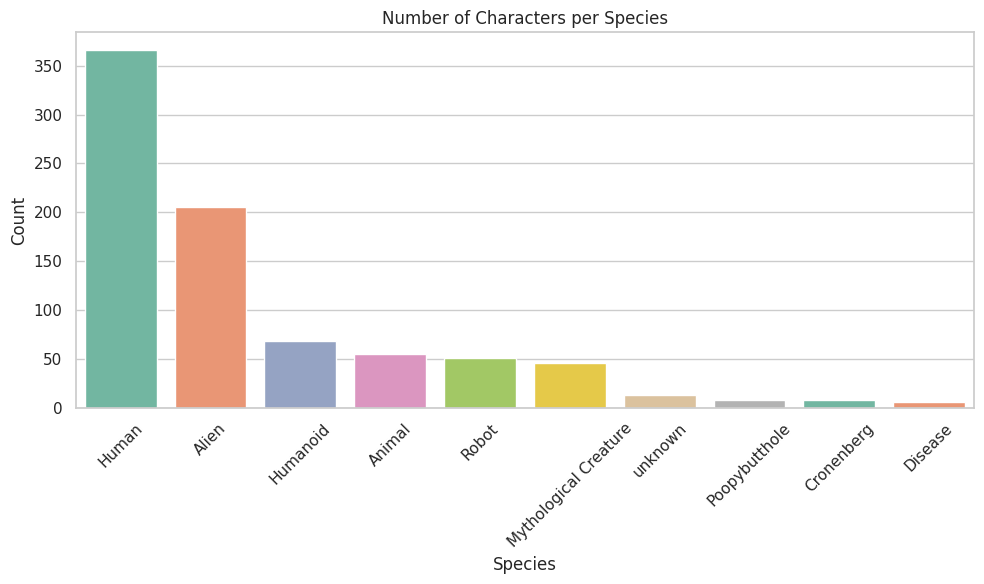

In [ ]:
#@ title Plot of Characters by Species

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species', palette='Set2', order=df['species'].value_counts().index[:10])
plt.title('Number of Characters per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-43-ea293fca803f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set1', order=df['gender'].value_counts().index)


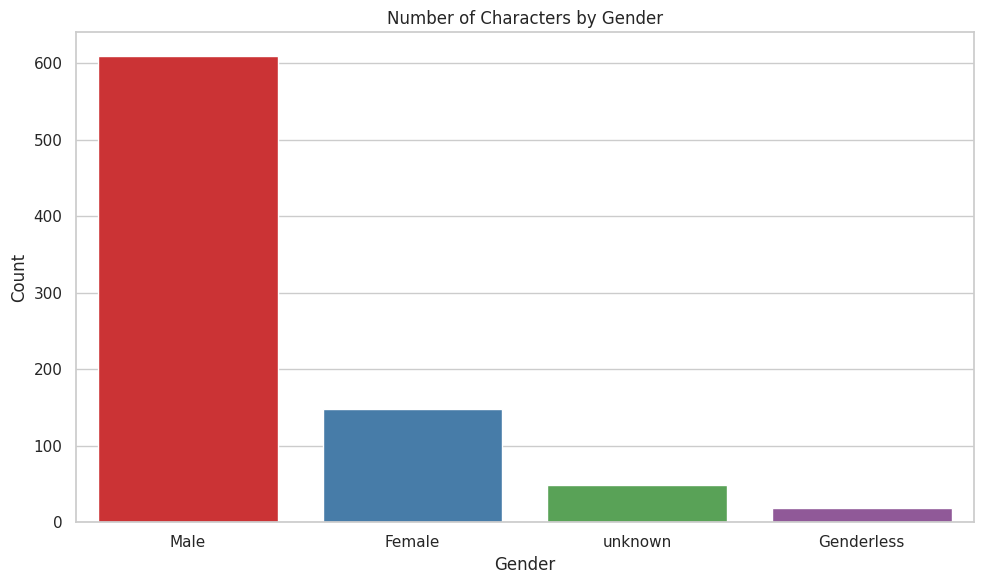

In [ ]:
# @title Plot of Characters by Gender

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', palette='Set1', order=df['gender'].value_counts().index)
plt.title('Number of Characters by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Value counts for the 'status' column
status_counts = df['status'].value_counts()

# Total number of characters
total_characters = len(df)

# Calculating percentage of occurence
status_percentages = (status_counts / total_characters) * 100

print(status_percentages)


Alive      53.147700
Dead       34.745763
unknown    12.106538
Name: status, dtype: float64


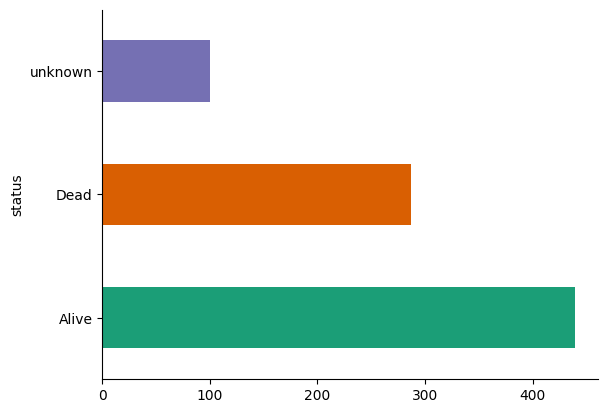

In [ ]:
# @title status of characters

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Most frequently occurring location
most_common_location = df['location_name'].value_counts().idxmax()

print("The most frequently occurring location is:", most_common_location)



The most frequently occurring location is: Earth (Replacement Dimension)


In [ ]:
# Most frequently occurring origin
most_common_origin = df['origin_name'].value_counts().idxmax()

print("The most frequently occurring origin is:", most_common_origin)

The most frequently occurring origin is: unknown


# **INSIGHTS**

The following insights can be gathered from the analysis:

1.   There are 757 unique character entries in the dataset
2.   A large percentage of the characters (48%) are not characterised by a type. After this, the largest percentage of characters by type is 'Souless Puppet'.
3. The origin of most characters is unknown
4. Most characters are from Earth (Replacement Dimension)
5. 53% of the characters have their status as Alive
6. There are more male characters than any other gender in the Rick & Morty Universe

